<a href="https://colab.research.google.com/github/kebabee/Modelowanie-komputerowe/blob/main/3_body_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 body problem

The goal is to implement a model approximating the gravitational interactions of 2 and 3 bodies. I implement everything in Python using the *numpy* and *matplotlib* libraries. The main assumption is to approximate the equations of motion and velocity using:
$$\bar{v}_i^{t+1}=\bar{v}_i^t+\frac{\Delta t}{m_i} \bar{F}_i$$
$$\bar{x}_i^{t+1}=\bar{x}_i^t+\Delta t\; \bar{v}_i^t$$
where:
* $\Delta t$ - time step
* $F$ - forces on i-th body

## Implementation
The *Planet* class represents objects that will interact gravitationally on a plane. It stores its mass, current coordinates and current speeds in two axes. Three additional methods are used in the main *n_body* function.

The *n_body* function mentioned above performs the movement of *Planet* objects. By iterating through time steps and all objects, the function overwrites the coordinates and velocities of each object. Additionally, it allows you to lock one object so that it does not move, draw a trajectory and examine the deviation of the trajectory from the circle.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
G=1
class Planet:
    def __init__(self, mass, x0, y0, vx0, vy0):
        self.m = mass
        self.x = x0
        self.y = y0
        self.vx = vx0
        self.vy = vy0

    def x_diff(self, other):
        return self.x - other.x

    def y_diff(self, other):
        return self.y - other.y

    def r_module(self, other):
        return np.sqrt( self.x_diff(other)**2 + self.y_diff(other)**2 )

def n_body(time_step, steps, planets, plot_flag=False, fixed_flag=False, return_v_flag=False):
    if plot_flag:
        x_plot = [[],[],[]]
        y_plot = [[],[],[]]
    if return_v_flag:
        vx_plot = [[],[],[]]
        vy_plot = [[],[],[]]
    dt = time_step
    for t in range(steps):
        t1 = t * dt

        rng = range(len(planets))
        if fixed_flag:
            rng = range(1,len(planets)) # body 0 remain fixed

        for i in rng:
            if plot_flag:
                x_plot[i].append(planets[i].x)
                y_plot[i].append(planets[i].y)
            if return_v_flag:
                vx_plot[i].append(planets[i].vx)
                vy_plot[i].append(planets[i].vy)
            F_ix = 0
            F_iy = 0
            for j in range(len(planets)):
                if i == j: # forces only from other bodies
                    continue
                F_ix += G * planets[j].m * planets[i].m / planets[i].r_module(planets[j]) ** 3 * planets[j].x_diff(planets[i])
                F_iy += G * planets[j].m * planets[i].m / planets[i].r_module(planets[j]) ** 3 * planets[j].y_diff(planets[i])
            planets[i].vx = planets[i].vx + dt * F_ix / planets[i].m # vx
            planets[i].vy = planets[i].vy + dt * F_iy / planets[i].m # vy
            planets[i].x = planets[i].x + dt * planets[i].vx # x
            planets[i].y = planets[i].y + dt * planets[i].vy # y

    errors.append(np.abs(R - np.sqrt((planets[0].x - planets[1].x) ** 2 + (planets[0].y - planets[1].y) ** 2)))

    if plot_flag:
        plt.plot(x_plot[0], y_plot[0])
        plt.plot(x_plot[1], y_plot[1])
        plt.plot(x_plot[2], y_plot[2])
        plt.grid(True)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()
        if return_v_flag:
            return [x_plot, y_plot, vx_plot, vy_plot]
        else:
            return [x_plot, y_plot]

Examples of two bodies, forst with fixed body. $\bar{x}_1 = (0,0)$, $\bar{x}_2 = (0,5)$, $\bar{v}_1 = (0,0)$, $\bar{v}_2 = (0,\sqrt{10^5/5})$, $m_1 = m_2 = 10^5$

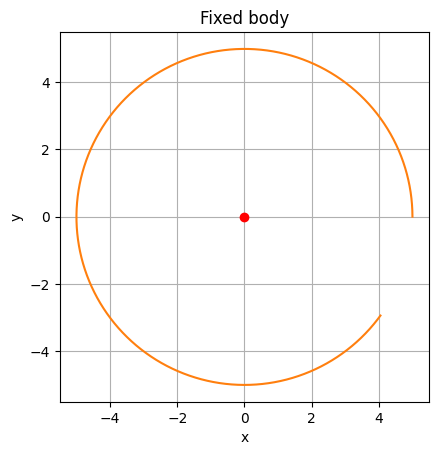

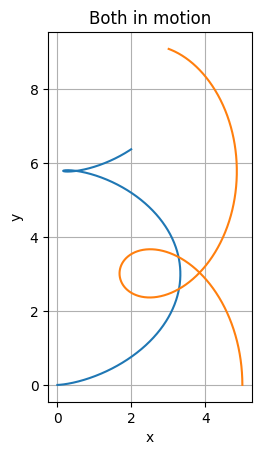

In [ ]:
R = 5
m1 = 1e5
G = 1
errors = []

plt.plot(0, 0, '-ro')
plt.title("Fixed body")
plt.xlabel('x')
plt.ylabel('y')
a = n_body(1e-4, 2000, [Planet(m1, 0, 0, 0, 0), Planet(m1, R, 0, 0, np.sqrt(m1/R))], True, True)
plt.title("Both in motion")
plt.xlabel('x')
plt.ylabel('y')
a = n_body(1e-4, 1100, [Planet(m1, 0, 0, 0, 0), Planet(m1, R, 0, 0, np.sqrt(m1/R))], True, False)

## Time step size and trajectory errors

The following code implements a scenario where one body is stationary and the second body moves in a circular orbit around the first one. To check how the size of the time step affects the accuracy of subsequent coordinate determination, I use:
$$e = |R - |\bar{x_1} - \bar{x_2}||$$

In an ideal situation, the radius along which the second body moves should be constant. The $e$ measure determines how much the final radius differs from the initial one in the simulation. I perform the simulation on 6 variants of time step values in the range of [$10^{-2}, 10^{-7}$]. When I reduce the time step, I increase their number so that each simulation makes the same progress.

In [ ]:
errors = []
step_sizes = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

for s in step_sizes:
    n_body(s, int(10/s), [Planet(m1, 0, 0, 0, 0), Planet(m1, R, 0, 0, np.sqrt(m1/R))], False, True)

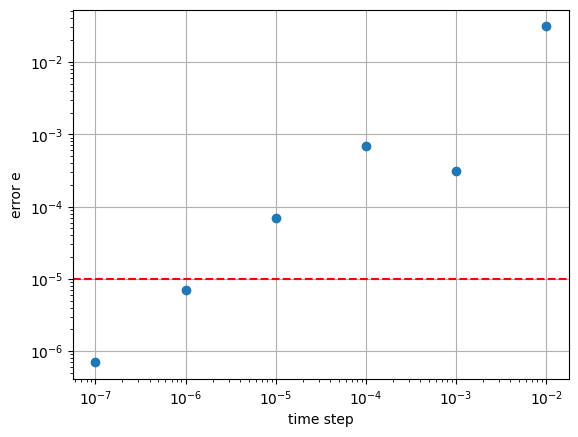

In [ ]:
plt.plot(step_sizes, errors, 'o')
plt.axhline(y=1e-5, color='r', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('time step')
plt.ylabel('error e')
plt.grid(True)
plt.show()

In [ ]:
errors[4]/errors[5]

10.00012910716969

The above graph shows the dependence of the error *e* on the size of the time step on a double logarithmic scale. By discarding the first two values, the graph forms a linear relationship, where a 10-fold decrease in the time step also causes a 10-fold decrease in the error. Of the checked values, $dt = 10^{-6}$ was the first one with a smaller error than $10^{-5}$ mentioned in the task.

## Motion of two bodies in an ellipse
Assuming $\bar{x}_1 = (0,0)$, $\bar{x}_2 = (1,0)$, $\bar{v}_1 = (0,-v)$, $\ bar{v}_2 = (0,v)$, $m_1 = m_2 = 1$ and with the appropriate *v*, both bodies will move along symmetrical ellipses. I am recording the run of 10 simulations for *v* in the range [$0.1$,$1.0$]. I choose the number of time steps so that the body completes one ellipse.

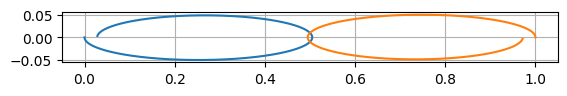

In [ ]:
data = []

data.append(n_body(1e-6, 1500000, [Planet(1, 0, 0, 0, -0.1),Planet(1, 1, 0, 0, 0.1)], True, False))

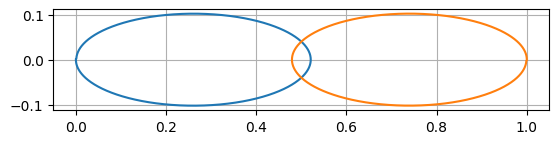

In [ ]:
data.append(n_body(1e-6, 1650000, [Planet(1, 0, 0, 0, -0.2),Planet(1, 1, 0, 0, 0.2)], True))

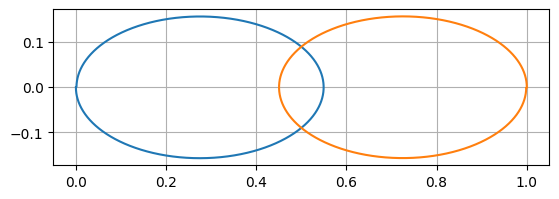

In [ ]:
data.append(n_body(1e-5, 180000, [Planet(1, 0, 0, 0, -0.3),Planet(1, 1, 0, 0, 0.3)], True))

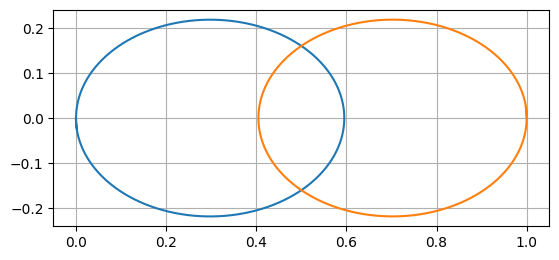

In [ ]:
data.append(n_body(1e-5, 210000, [Planet(1, 0, 0, 0, -0.4),Planet(1, 1, 0, 0, 0.4)], True))

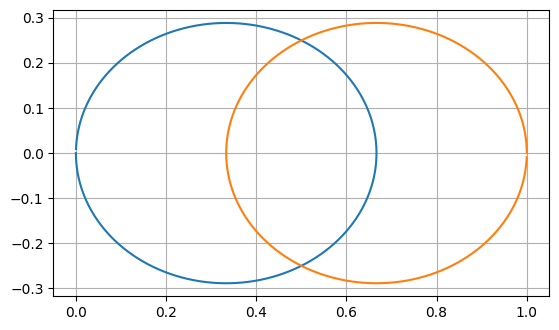

In [ ]:
data.append(n_body(1e-5, 240000, [Planet(1, 0, 0, 0, -0.5),Planet(1, 1, 0, 0, 0.5)], True))

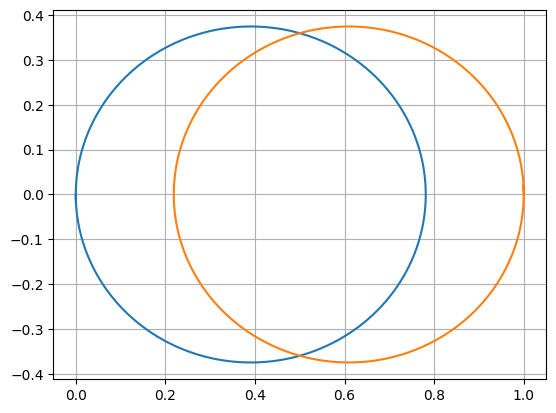

In [ ]:
data.append(n_body(1e-5, 310000, [Planet(1, 0, 0, 0, -0.6),Planet(1, 1, 0, 0, 0.6)], True))

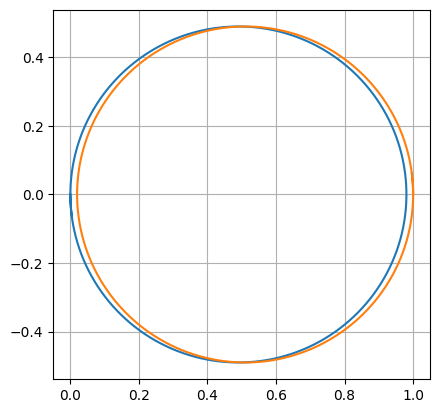

In [ ]:
data.append(n_body(1e-5, 440000, [Planet(1, 0, 0, 0, -0.7),Planet(1, 1, 0, 0, 0.7)], True))

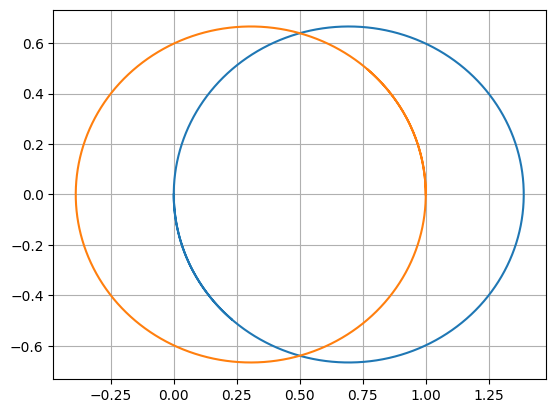

In [ ]:
data.append(n_body(1e-5, 800000, [Planet(1, 0, 0, 0, -0.8),Planet(1, 1, 0, 0, 0.8)], True))

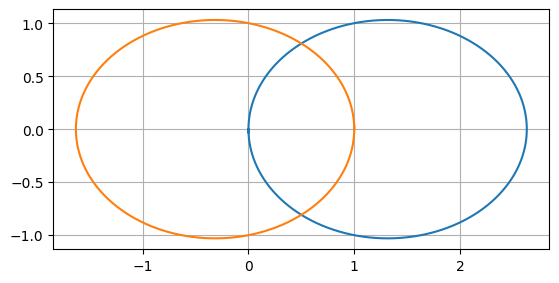

In [ ]:
data.append(n_body(1e-5, 1900000, [Planet(1, 0, 0, 0, -0.9),Planet(1, 1, 0, 0, 0.9)], True))

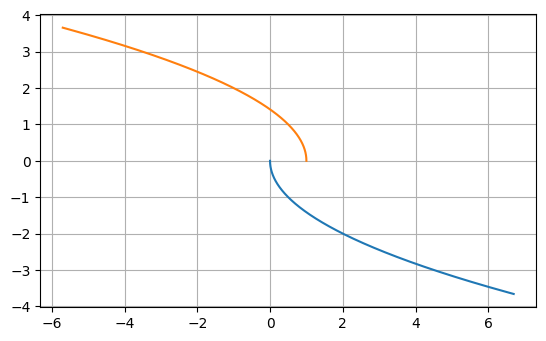

In [ ]:
data.append(n_body(1e-5, 2000000, [Planet(1, 0, 0, 0, -1.0),Planet(1, 1, 0, 0, 1.0)], True))

At $v=1.0$ the bodies stop forming elliptical orbits. Using the data from the above simulations, I draw a graph of the dependence of the ratio of the minor and major diameters of the ellipse on the speed *v*.

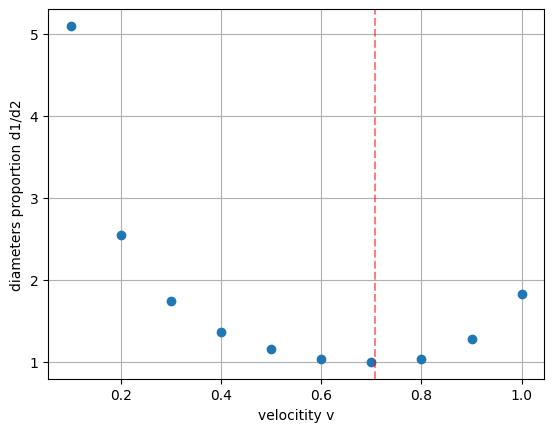

In [ ]:
d_ratios = []
vs = np.linspace(0.1, 1.0, 10)

for i in range(len(data)):
    d_ratios.append( (np.max( data[i][0][0] )-np.min( data[i][0][0] )) / (np.max( data[i][1][0] )-np.min( data[i][1][0])) )

plt.plot(vs, d_ratios, 'o')
plt.axvline(np.sqrt(1/2), c='red', linestyle='--', alpha=0.5)
plt.xlabel("velocitity v")
plt.ylabel("diameters proportion d1/d2")
plt.grid(True)
plt.show()

As the value of $d_1/d_2$ decreases, the ellipse becomes more and more like a circle, a ratio of one equals dividing the diameter of the circle by itself. The red dashed line on the graph represents the speed $v=\sqrt{\frac{m_2^2}{m_1 + m_2}}$ mentioned in the task, i.e. in this specific case $\sqrt{0.5}$. At this value, theoretically, there is a minimum of the function from the graph, precisely equal to 1, below is a drawing of this case:

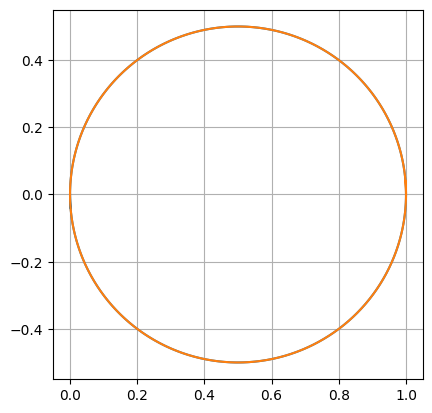

In [ ]:
new_data = n_body(1e-6, 4500000, [Planet(1, 0, 0, 0, -np.sqrt(1/2)),Planet(1, 1, 0, 0, np.sqrt(1/2))], True)

In [ ]:
print(f"d1/d2 = {(np.max( new_data[0][0] )-np.min( new_data[0][0] )) / (np.max( new_data[1][0] )-np.min( new_data[1][0]))}")

d1/d2 = 1.0000016660849484


With a time step of $dt=10^{-6}$, it was possible to obtain a diameter ratio of 1 with an accuracy of 5 decimal places.

## 3 bodies motion

### The case of gravity

The function from the beginning of the notebook will also work for the case of 3 bodies. The parameters of the last simulation are $\bar{x}_1 = (3.4722222222222197, 4.55555555555556)$, $\bar{x}_2 = (1.3749999999999982, -2.84722222222224)$, $\bar{x}_3 = (-4.819444 444444439, -1.7777777777777795) $, $\bar{v}_1 = \bar{v}_2 = \bar{v}_2 = (0,0)$, $m_1 = m_2 = m_3 = 10$

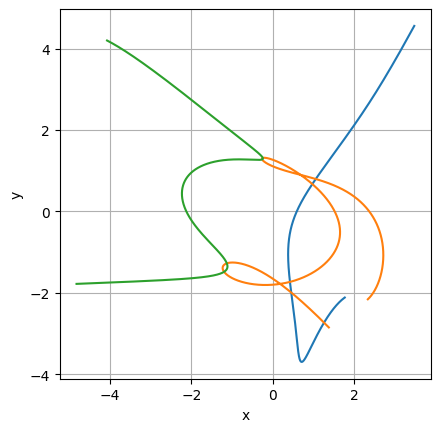

In [ ]:
p1 = Planet(10, 3.4722222222222197, 4.555555555555556, 0, 0)
p2 = Planet(10, 1.3749999999999982, -2.847222222222224, 0 , 0)
p3 = Planet(10, -4.819444444444439, -1.7777777777777795, 0 , 0)
ps=[p1,p2,p3]

plt.xlabel('x')
plt.ylabel('y')
data3 = n_body(1e-6, 10000000, ps, plot_flag=True, fixed_flag=False, return_v_flag=True)

The second and third bodies of the two councils made a "loop" around themselves, which will be important for later analysis. Velocity graph:

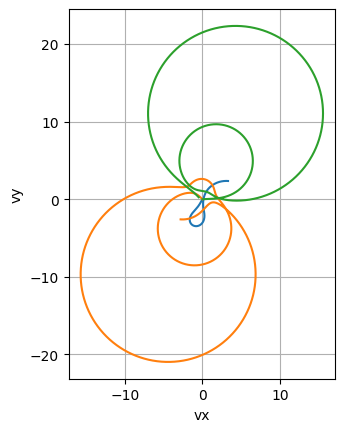

In [ ]:
plt.plot(data3[2][0], data3[3][0])
plt.plot(data3[2][1], data3[3][1])
plt.plot(data3[2][2], data3[3][2])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('vx')
plt.ylabel('vy')
plt.grid(True)
plt.show()

To create the *R* matrix, I will reduce the position and velocity vectors from 10000000 elements to 1000 elements, maintaining every ten thousandth step. The subsequent elements of the matrix are defined as:
$$R_{ij} = |s_i - s_j|$$
where *s* is a state vector storing information about the positions and velocities in both axes for all three bodies.

In [ ]:
for i in range(len(data3)):
    for j in range(len(data3[i])):
        data3[i][j] = data3[i][j][:10000000:10000]

R = np.ones((1000,1000))

for i in range(len(R)):
    state1 = np.array([data3[0][0][i], data3[1][0][i], data3[2][0][i], data3[3][0][i],
                data3[0][1][i], data3[1][1][i], data3[2][1][i], data3[3][1][i],
                 data3[0][2][i], data3[1][2][i], data3[2][2][i], data3[3][2][i]])
    for j in range(len(R)):
        state2 = np.array([data3[0][0][j], data3[1][0][j], data3[2][0][j], data3[3][0][j],
                    data3[0][1][j], data3[1][1][j], data3[2][1][j], data3[3][1][j],
                     data3[0][2][j], data3[1][2][j], data3[2][2][j], data3[3][2][j]])
        R[i][j] = np.linalg.norm(state1 - state2)

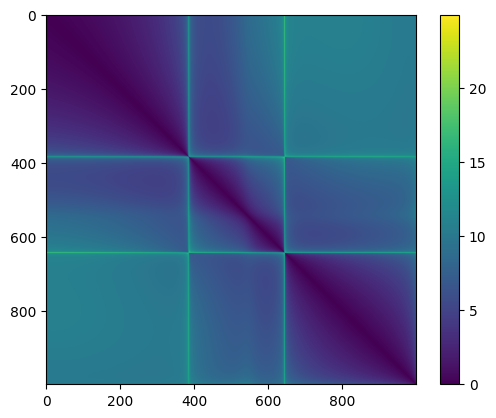

In [ ]:
plt.imshow(R)
plt.colorbar()
plt.show()

The graph shows two prominent moments in the simulation, around step 390 and 640. These probably represent the "loops" mentioned in the trajectory graph. Then, over several dozen, perhaps several hundred, steps, the speed and position changed much faster from step to step than at other moments in the simulation.